# Test 6 {#sec-test_6}
Test circuit number 6 is similar to test circuit number 5, but with the addition of coupled inductors. This test circuit includes all the element types except for Op Amps. V4 is the independent voltage source and is set to 10 volts DC when calculating the DC operating point and to 20 volts AC for the AC analysis. 

![Test #6 circuit](test_6.png){#fig-test_6}

```
V4 1 2 AC 10
I2 3 4 5
F1 5 9 V1 5
E1 12 3 10 1 3
G1 7 10 9 4 2
H1 2 12 V2 2
R3 5 1 10
R4 3 7 1
R10 8 0 10
R14 10 9 10
R2 3 5 5
R7 8 7 6
R11 10 9 5
R12 0 10 9
R16 12 11 10
R8 3 8 5
R17 2 6 8
V1 6 3 0
V2 13 5 0
R18 12 13 4
C1 7 1 2
C2 1 9 5
L1 1 5 3 Rser=0
L2 0 11 8 Rser=0
L3 9 11 8 Rser=0
L4 4 8 10 Rser=0
K1 L3 L4 0.5
```

In [56]:
#import os
from sympy import *
import numpy as np
from tabulate import tabulate
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd
import SymMNA
from IPython.display import display, Markdown, Math, Latex
init_printing()

## Load the net list

In [57]:
net_list = '''
V4 1 2 20
I2 3 4 5
F1 5 9 V1 5
E1 12 3 10 1 3
G1 7 10 9 4 2
H1 2 12 V2 2
R3 5 1 10
R4 3 7 1
R10 8 0 10
R14 10 9 10
R2 3 5 5
R7 8 7 6
R11 10 9 5
R12 0 10 9
R16 12 11 10
R8 3 8 5
R17 2 6 8
V1 6 3 0
V2 13 5 0
R18 12 13 4
C1 7 1 2
C2 1 9 5
L1 1 5 3
L2 0 11 8
L3 9 11 8
L4 4 8 10
K1 L3 L4 0.5
'''

## Call the symbolic modified nodal analysis function

In [58]:
report, network_df, i_unk_df, A, X, Z = SymMNA.smna(net_list)

Display the equations

In [59]:
# reform X and Z into Matrix type for printing
Xp = Matrix(X)
Zp = Matrix(Z)
temp = ''
for i in range(len(X)):
    temp += '${:s}$<br>'.format(latex(Eq((A*Xp)[i:i+1][0],Zp[i])))

Markdown(temp)

$- C_{1} s v_{7} - C_{2} s v_{9} + I_{L1} + I_{V4} + v_{1} \left(C_{1} s + C_{2} s + \frac{1}{R_{3}}\right) - \frac{v_{5}}{R_{3}} = 0$<br>$I_{H1} - I_{V4} + \frac{v_{2}}{R_{17}} - \frac{v_{6}}{R_{17}} = 0$<br>$- I_{Ea1} - I_{V1} + v_{3} \cdot \left(\frac{1}{R_{8}} + \frac{1}{R_{4}} + \frac{1}{R_{2}}\right) - \frac{v_{8}}{R_{8}} - \frac{v_{7}}{R_{4}} - \frac{v_{5}}{R_{2}} = - I_{2}$<br>$I_{L4} = I_{2}$<br>$I_{F1} - I_{L1} - I_{V2} + v_{5} \cdot \left(\frac{1}{R_{3}} + \frac{1}{R_{2}}\right) - \frac{v_{1}}{R_{3}} - \frac{v_{3}}{R_{2}} = 0$<br>$I_{V1} - \frac{v_{2}}{R_{17}} + \frac{v_{6}}{R_{17}} = 0$<br>$- C_{1} s v_{1} - g_{1} v_{4} + g_{1} v_{9} + v_{7} \left(C_{1} s + \frac{1}{R_{7}} + \frac{1}{R_{4}}\right) - \frac{v_{8}}{R_{7}} - \frac{v_{3}}{R_{4}} = 0$<br>$- I_{L4} + v_{8} \cdot \left(\frac{1}{R_{8}} + \frac{1}{R_{7}} + \frac{1}{R_{10}}\right) - \frac{v_{3}}{R_{8}} - \frac{v_{7}}{R_{7}} = 0$<br>$- C_{2} s v_{1} - I_{F1} + I_{L3} + v_{10} \left(- \frac{1}{R_{14}} - \frac{1}{R_{11}}\right) + v_{9} \left(C_{2} s + \frac{1}{R_{14}} + \frac{1}{R_{11}}\right) = 0$<br>$g_{1} v_{4} + v_{10} \cdot \left(\frac{1}{R_{14}} + \frac{1}{R_{12}} + \frac{1}{R_{11}}\right) + v_{9} \left(- g_{1} - \frac{1}{R_{14}} - \frac{1}{R_{11}}\right) = 0$<br>$- I_{L2} - I_{L3} + \frac{v_{11}}{R_{16}} - \frac{v_{12}}{R_{16}} = 0$<br>$I_{Ea1} - I_{H1} + v_{12} \cdot \left(\frac{1}{R_{18}} + \frac{1}{R_{16}}\right) - \frac{v_{13}}{R_{18}} - \frac{v_{11}}{R_{16}} = 0$<br>$I_{V2} - \frac{v_{12}}{R_{18}} + \frac{v_{13}}{R_{18}} = 0$<br>$v_{1} - v_{2} = V_{4}$<br>$- v_{3} + v_{6} = V_{1}$<br>$v_{13} - v_{5} = V_{2}$<br>$I_{F1} - I_{V1} f_{1} = 0$<br>$ea_{1} v_{1} - ea_{1} v_{10} + v_{12} - v_{3} = 0$<br>$- I_{V2} h_{1} - v_{12} + v_{2} = 0$<br>$- I_{L1} L_{1} s + v_{1} - v_{5} = 0$<br>$- I_{L2} L_{2} s - v_{11} = 0$<br>$- I_{L3} L_{3} s - I_{L4} M_{1} s - v_{11} + v_{9} = 0$<br>$- I_{L3} M_{1} s - I_{L4} L_{4} s + v_{4} - v_{8} = 0$<br>

### Netlist statistics

In [60]:
print(report)

Net list report
number of lines in netlist: 27
number of branches: 26
number of nodes: 13
number of unknown currents: 10
number of RLC (passive components): 18
number of inductors: 4
number of independent voltage sources: 3
number of independent current sources: 1
number of op amps: 0
number of E - VCVS: 1
number of G - VCCS: 1
number of F - CCCS: 1
number of H - CCVS: 1
number of K - Coupled inductors: 1



### Connectivity Matrix

In [61]:
A

⎡              1                             -1                               
⎢C₁⋅s + C₂⋅s + ──   0        0         0     ───     0       -C₁⋅s            
⎢              R₃                             R₃                              
⎢                                                                             
⎢                   1                               -1                        
⎢       0          ───       0         0      0     ───        0              
⎢                  R₁₇                              R₁₇                       
⎢                                                                             
⎢                       1    1    1          -1               -1              
⎢       0           0   ── + ── + ──   0     ───     0        ───             
⎢                       R₈   R₄   R₂          R₂               R₄             
⎢                                                                             
⎢       0           0        0         0      0     

### Unknown voltages and currents

In [62]:
X

### Known voltages and currents

In [63]:
Z

### Network dataframe

In [64]:
network_df

,element,p node,n node,cp node,cn node,Vout,value,Vname,Lname1,Lname2
0,V4,1,2,NaN,NaN,NaN,20.0,NaN,NaN,NaN
1,V1,6,3,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,V2,13,5,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,I2,3,4,NaN,NaN,NaN,5.0,NaN,NaN,NaN
4,F1,5,9,NaN,NaN,NaN,5.0,V1,NaN,NaN
5,Ea1,12,3,10,1,NaN,3.0,NaN,NaN,NaN
6,G1,7,10,9,4,NaN,2.0,NaN,NaN,NaN
7,H1,2,12,NaN,NaN,NaN,2.0,V2,NaN,NaN
8,R3,5,1,NaN,NaN,NaN,10.0,NaN,NaN,NaN
9,R4,3,7,NaN,NaN,NaN,1.0,NaN,NaN,NaN


### Unknown current dataframe

In [65]:
i_unk_df

,element,p node,n node
0,V4,1,2
1,V1,6,3
2,V2,13,5
3,F1,5,9
4,Ea1,12,3
5,H1,2,12
6,L1,1,5
7,L2,0,11
8,L3,9,11
9,L4,4,8


### Build the network equations

In [66]:
# Put matrices into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

Turn the free symbols into SymPy variables.

In [67]:
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

## Symbolic solution
The symbolic solution was taking longer than a couple of minutes on my i3-8130U CPU @ 2.20GHz, so I interruped the kernel and commended the code.

In [68]:
#U_sym = solve(NE_sym,X)

Display the symbolic solution

In [69]:
#temp = ''
#for i in U_sym.keys():
#    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

#Markdown(temp)

## Construct a dictionary of element values

In [70]:
element_values = SymMNA.get_part_values(network_df)

# display the component values
for k,v in element_values.items():
    print('{:s} = {:s}'.format(str(k), str(v)))

V4 = 20.0
V1 = 0.0
V2 = 0.0
I2 = 5.0
f1 = 5.0
ea1 = 3.0
g1 = 2.0
h1 = 2.0
R3 = 10.0
R4 = 1.0
R10 = 10.0
R14 = 10.0
R2 = 5.0
R7 = 6.0
R11 = 5.0
R12 = 9.0
R16 = 10.0
R8 = 5.0
R17 = 8.0
R18 = 4.0
C1 = 2.0
C2 = 5.0
L1 = 3.0
L2 = 8.0
L3 = 8.0
L4 = 10.0
K1 = 0.5


### Mutual inductance
In the netlist, the line below specifies that L3 and L4 are connected by a magnetic circuit.
> K1 L3 L4 0.5

K1 identifies the mutual inductance between in two inductors, L3 and L4. k is the coefficient of coupling. 

A coupled inductor has two or more windings that are connected by a magnetic circuit. Coupled inductors transfer energy from one winding to a different winding usually through a commonly used core. The efficiency of the magnetic coupling between both the windings is defined by the coupling factor k or by mutual inductance.

The coupling constant and the [mutual inductance](https://en.wikipedia.org/wiki/Inductance#Mutual_inductance) are related by the equation:

$k = \frac {M}{\sqrt{L_1 \times L_2}}$

Where k is the coupling coefficient and in spice the value of k can be from -1 to +1 to account for a a negative phase relation. Phase dots are drawn on the schematic to indicate the relative direction of the windings. In LTspice the phase dots are associated with the negative terminal of the winding. 

In [71]:
K1 = symbols('K1')
# calculate the coupling constant from the mutual inductance
element_values[M1] = element_values[K1]*np.sqrt(element_values[L3] *element_values[L4])
print('mutual inductance, M1 = {:.9f}'.format(element_values[M1]))

mutual inductance, M1 = 4.472135955


In [72]:
element_values

## DC operating point
Both V4 and I2 are active.

In [73]:
NE = NE_sym.subs(element_values)
NE_dc = NE.subs({s:0})

Display the equations with numeric values.

In [74]:
temp = ''
for i in range(shape(NE_dc.lhs)[0]):
    temp += '${:s} = {:s}$<br>'.format(latex(NE_dc.rhs[i]),latex(NE_dc.lhs[i]))

Markdown(temp)

$0 = I_{L1} + I_{V4} + 0.1 v_{1} - 0.1 v_{5}$<br>$0 = I_{H1} - I_{V4} + 0.125 v_{2} - 0.125 v_{6}$<br>$-5.0 = - I_{Ea1} - I_{V1} + 1.4 v_{3} - 0.2 v_{5} - 1.0 v_{7} - 0.2 v_{8}$<br>$5.0 = I_{L4}$<br>$0 = I_{F1} - I_{L1} - I_{V2} - 0.1 v_{1} - 0.2 v_{3} + 0.3 v_{5}$<br>$0 = I_{V1} - 0.125 v_{2} + 0.125 v_{6}$<br>$0 = - 1.0 v_{3} - 2.0 v_{4} + 1.16666666666667 v_{7} - 0.166666666666667 v_{8} + 2.0 v_{9}$<br>$0 = - I_{L4} - 0.2 v_{3} - 0.166666666666667 v_{7} + 0.466666666666667 v_{8}$<br>$0 = - I_{F1} + I_{L3} - 0.3 v_{10} + 0.3 v_{9}$<br>$0 = 0.411111111111111 v_{10} + 2.0 v_{4} - 2.3 v_{9}$<br>$0 = - I_{L2} - I_{L3} + 0.1 v_{11} - 0.1 v_{12}$<br>$0 = I_{Ea1} - I_{H1} - 0.1 v_{11} + 0.35 v_{12} - 0.25 v_{13}$<br>$0 = I_{V2} - 0.25 v_{12} + 0.25 v_{13}$<br>$20.0 = v_{1} - v_{2}$<br>$0 = - v_{3} + v_{6}$<br>$0 = v_{13} - v_{5}$<br>$0 = I_{F1} - 5.0 I_{V1}$<br>$0 = 3.0 v_{1} - 3.0 v_{10} + v_{12} - v_{3}$<br>$0 = - 2.0 I_{V2} - v_{12} + v_{2}$<br>$0 = v_{1} - v_{5}$<br>$0 = - v_{11}$<br>$0 = - v_{11} + v_{9}$<br>$0 = v_{4} - v_{8}$<br>

Solve for voltages and currents.

In [75]:
U_dc = solve(NE_dc,X)

Display the numerical solution

Six significant digits are displayed so that results can be compared to LTSpice. 

In [76]:
table_header = ['unknown', 'mag']
table_row = []

for name, value in U_dc.items():
    table_row.append([str(name),float(value)])

print(tabulate(table_row, headers=table_header,colalign = ('left','decimal'),tablefmt="simple",floatfmt=('5s','.6f')))

unknown           mag
---------  ----------
v1           3.367922
v2         -16.632078
v3         -15.060648
v4          -1.041413
v5           3.367922
v6         -15.060648
v7         -14.843180
v8          -1.041413
v9           0.000000
v10          5.066334
v11          0.000000
v12         -9.965411
v13          3.367922
I_V4        -6.036903
I_V1        -0.196429
I_V2        -3.333333
I_F1        -0.982144
I_Ea1       -1.510600
I_H1        -5.840475
I_L1         6.036903
I_L2         0.458785
I_L3         0.537756
I_L4         5.000000


The node voltages and current through the sources are solved for. The Sympy generated solution matches the LTSpice results:
```
       --- Operating Point ---

V(1):	 3.36792	 voltage
V(2):	 -16.6321	 voltage
V(3):	 -15.0606	 voltage
V(4):	 -1.04141	 voltage
V(5):	 3.36792	 voltage
V(9):	 1.11022e-16	 voltage
V(12):	 -9.96541	 voltage
V(10):	 5.06633	 voltage
V(7):	 -14.8432	 voltage
V(8):	 -1.04141	 voltage
V(11):	 0	 voltage
V(6):	 -15.0606	 voltage
V(13):	 3.36792	 voltage
I(C1):	 -3.64222e-11	 device_current
I(C2):	 1.68396e-11	 device_current
I(F1):	 -0.982144	 device_current
I(H1):	 -5.84047	 device_current
I(L1):	 6.0369	 device_current
I(L2):	 0.458785	 device_current
I(L3):	 0.537756	 device_current
I(L4):	 5	 device_current
I(I2):	 5	 device_current
I(R3):	 5.32907e-16	 device_current
I(R4):	 -0.217468	 device_current
I(R10):	 -0.104141	 device_current
I(R14):	 0.506633	 device_current
I(R2):	 -3.68571	 device_current
I(R7):	 2.30029	 device_current
I(R11):	 1.01327	 device_current
I(R12):	 -0.562926	 device_current
I(R16):	 -0.996541	 device_current
I(R8):	 -2.80385	 device_current
I(R17):	 -0.196429	 device_current
I(R18):	 -3.33333	 device_current
I(G1):	 2.08283	 device_current
I(E1):	 -1.5106	 device_current
I(V4):	 -6.0369	 device_current
I(V1):	 -0.196429	 device_current
I(V2):	 -3.33333	 device_current
```
The results from LTSpice agree with the SymPy results.

### AC analysis
Solve equations for $\omega$ equal to 1 radian per second, s = 1j.

Need to set I2 = 0 and V4 = 10

In [77]:
element_values[I2] = 0
element_values[V4] = 10
NE = NE_sym.subs(element_values)
NE_w1 = NE.subs({s:1j})

Display the equations with numeric values.

In [78]:
temp = ''
for i in range(shape(NE_w1.lhs)[0]):
    temp += '${:s} = {:s}$<br>'.format(latex(NE_w1.rhs[i]),latex(NE_w1.lhs[i]))

Markdown(temp)

$0 = I_{L1} + I_{V4} + v_{1} \cdot \left(0.1 + 7.0 i\right) - 0.1 v_{5} - 2.0 i v_{7} - 5.0 i v_{9}$<br>$0 = I_{H1} - I_{V4} + 0.125 v_{2} - 0.125 v_{6}$<br>$0 = - I_{Ea1} - I_{V1} + 1.4 v_{3} - 0.2 v_{5} - 1.0 v_{7} - 0.2 v_{8}$<br>$0 = I_{L4}$<br>$0 = I_{F1} - I_{L1} - I_{V2} - 0.1 v_{1} - 0.2 v_{3} + 0.3 v_{5}$<br>$0 = I_{V1} - 0.125 v_{2} + 0.125 v_{6}$<br>$0 = - 2.0 i v_{1} - 1.0 v_{3} - 2.0 v_{4} + v_{7} \cdot \left(1.16666666666667 + 2.0 i\right) - 0.166666666666667 v_{8} + 2.0 v_{9}$<br>$0 = - I_{L4} - 0.2 v_{3} - 0.166666666666667 v_{7} + 0.466666666666667 v_{8}$<br>$0 = - I_{F1} + I_{L3} - 5.0 i v_{1} - 0.3 v_{10} + v_{9} \cdot \left(0.3 + 5.0 i\right)$<br>$0 = 0.411111111111111 v_{10} + 2.0 v_{4} - 2.3 v_{9}$<br>$0 = - I_{L2} - I_{L3} + 0.1 v_{11} - 0.1 v_{12}$<br>$0 = I_{Ea1} - I_{H1} - 0.1 v_{11} + 0.35 v_{12} - 0.25 v_{13}$<br>$0 = I_{V2} - 0.25 v_{12} + 0.25 v_{13}$<br>$10 = v_{1} - v_{2}$<br>$0 = - v_{3} + v_{6}$<br>$0 = v_{13} - v_{5}$<br>$0 = I_{F1} - 5.0 I_{V1}$<br>$0 = 3.0 v_{1} - 3.0 v_{10} + v_{12} - v_{3}$<br>$0 = - 2.0 I_{V2} - v_{12} + v_{2}$<br>$0 = - 3.0 i I_{L1} + v_{1} - v_{5}$<br>$0 = - 8.0 i I_{L2} - v_{11}$<br>$0 = - 8.0 i I_{L3} - 4.47213595499958 i I_{L4} - v_{11} + v_{9}$<br>$0 = - 4.47213595499958 i I_{L3} - 10.0 i I_{L4} + v_{4} - v_{8}$<br>

Solve for voltages and currents.

In [79]:
U_w1 = solve(NE_w1,X)

Display the numerical solution

Six significant digits are displayed so that results can be compared to LTSpice. 

In [80]:
table_header = ['unknown', 'mag','phase, deg']
table_row = []

for name, value in U_w1.items():
    table_row.append([str(name),float(abs(value)),float(arg(value)*180/np.pi)])

print(tabulate(table_row, headers=table_header,colalign = ('left','decimal','decimal'),tablefmt="simple",floatfmt=('5s','.6f','.6f')))

unknown         mag    phase, deg
---------  --------  ------------
v1         1.636070    -13.116769
v2         8.414810   -177.471137
v3         0.586907     -3.586473
v4         1.987061     30.488547
v5         7.659782     29.941452
v6         0.586907     -3.586473
v7         1.673460      2.228237
v8         0.848285      0.506771
v9         1.767765     29.618572
v10        0.268017     -3.585934
v11        0.916416    -90.556353
v12        3.543942    163.157171
v13        7.659782     29.941452
I_V4       5.376987   -165.047830
I_V1       1.124824   -177.869238
I_V2       2.602977   -164.421170
I_F1       5.624122   -177.869238
I_Ea1      1.485962   -145.541756
I_H1       4.287481   -161.710238
I_L1       2.186723    129.745082
I_L2       0.114552     -0.556353
I_L3       0.295629    -40.810152
I_L4       0.000000    nan



```
       --- AC Analysis ---

frequency:	0.159155	Hz
V(1):	mag:    1.63607 phase:   -13.1168° 	voltage
V(2):	mag:    8.41481 phase:   -177.471° 	voltage
V(3):	mag:   0.586907 phase:   -3.58647° 	voltage
V(4):	mag:    1.98706 phase:    30.4885° 	voltage
V(5):	mag:    7.65978 phase:    29.9415° 	voltage
V(9):	mag:    1.76776 phase:    29.6186° 	voltage
V(12):	mag:    3.54394 phase:    163.157° 	voltage
V(10):	mag:   0.268017 phase:   -3.58593° 	voltage
V(7):	mag:    1.67346 phase:    2.22824° 	voltage
V(8):	mag:   0.848285 phase:   0.506771° 	voltage
V(11):	mag:   0.916416 phase:   -90.5564° 	voltage
V(6):	mag:   0.586907 phase:   -3.58647° 	voltage
V(13):	mag:    7.65978 phase:    29.9415° 	voltage
I(C1):	mag:   0.886817 phase:    169.762° 	device_current
I(C2):	mag:    6.23121 phase:    2.60332° 	device_current
I(F1):	mag:    5.62412 phase:   -177.869° 	device_current
I(H1):	mag:    4.28748 phase:    -161.71° 	device_current
I(L1):	mag:    2.18672 phase:    129.745° 	device_current
I(L2):	mag:   0.114552 phase:  -0.556353° 	device_current
I(L3):	mag:   0.295629 phase:   -40.8102° 	device_current
I(L4):	mag:          0 phase:          0° 	device_current
I(I2):	mag:          0 phase:          0° 	device_current
I(R3):	mag:   0.656017 phase:    39.7451° 	device_current
I(R4):	mag:    1.09119 phase:   -174.648° 	device_current
I(R10):	mag:  0.0848285 phase:   0.506771° 	device_current
I(R14):	mag:   0.155047 phase:   -144.949° 	device_current
I(R2):	mag:    1.43557 phase:    -147.47° 	device_current
I(R7):	mag:   0.137659 phase:   -176.004° 	device_current
I(R11):	mag:   0.310094 phase:   -144.949° 	device_current
I(R12):	mag:  0.0297797 phase:    176.414° 	device_current
I(R16):	mag:    0.39014 phase:    150.127° 	device_current
I(R8):	mag:  0.0532384 phase:   -170.438° 	device_current
I(R17):	mag:    1.12482 phase:   -177.869° 	device_current
I(R18):	mag:    2.60298 phase:   -164.421° 	device_current
I(G1):	mag:   0.442271 phase:    -142.54° 	device_current
I(E1):	mag:    1.48596 phase:   -145.542° 	device_current
I(V4):	mag:    5.37699 phase:   -165.048° 	device_current
I(V1):	mag:    1.12482 phase:   -177.869° 	device_current
I(V2):	mag:    2.60298 phase:   -164.421° 	device_current
```

### AC Sweep
Looking at node 10 voltage and comparing the results with those obtained from LTSpice. The frequency sweep is from 0.01 Hz to 1 Hz.

In [81]:
NE = NE_sym.subs(element_values)

Display the equations with numeric values.

In [82]:
temp = ''
for i in range(shape(NE.lhs)[0]):
    temp += '${:s} = {:s}$<br>'.format(latex(NE.rhs[i]),latex(NE.lhs[i]))

Markdown(temp)

$0 = I_{L1} + I_{V4} - 2.0 s v_{7} - 5.0 s v_{9} + v_{1} \cdot \left(7.0 s + 0.1\right) - 0.1 v_{5}$<br>$0 = I_{H1} - I_{V4} + 0.125 v_{2} - 0.125 v_{6}$<br>$0 = - I_{Ea1} - I_{V1} + 1.4 v_{3} - 0.2 v_{5} - 1.0 v_{7} - 0.2 v_{8}$<br>$0 = I_{L4}$<br>$0 = I_{F1} - I_{L1} - I_{V2} - 0.1 v_{1} - 0.2 v_{3} + 0.3 v_{5}$<br>$0 = I_{V1} - 0.125 v_{2} + 0.125 v_{6}$<br>$0 = - 2.0 s v_{1} - 1.0 v_{3} - 2.0 v_{4} + v_{7} \cdot \left(2.0 s + 1.16666666666667\right) - 0.166666666666667 v_{8} + 2.0 v_{9}$<br>$0 = - I_{L4} - 0.2 v_{3} - 0.166666666666667 v_{7} + 0.466666666666667 v_{8}$<br>$0 = - I_{F1} + I_{L3} - 5.0 s v_{1} - 0.3 v_{10} + v_{9} \cdot \left(5.0 s + 0.3\right)$<br>$0 = 0.411111111111111 v_{10} + 2.0 v_{4} - 2.3 v_{9}$<br>$0 = - I_{L2} - I_{L3} + 0.1 v_{11} - 0.1 v_{12}$<br>$0 = I_{Ea1} - I_{H1} - 0.1 v_{11} + 0.35 v_{12} - 0.25 v_{13}$<br>$0 = I_{V2} - 0.25 v_{12} + 0.25 v_{13}$<br>$10 = v_{1} - v_{2}$<br>$0 = - v_{3} + v_{6}$<br>$0 = v_{13} - v_{5}$<br>$0 = I_{F1} - 5.0 I_{V1}$<br>$0 = 3.0 v_{1} - 3.0 v_{10} + v_{12} - v_{3}$<br>$0 = - 2.0 I_{V2} - v_{12} + v_{2}$<br>$0 = - 3.0 I_{L1} s + v_{1} - v_{5}$<br>$0 = - 8.0 I_{L2} s - v_{11}$<br>$0 = - 8.0 I_{L3} s - 4.47213595499958 I_{L4} s - v_{11} + v_{9}$<br>$0 = - 4.47213595499958 I_{L3} s - 10.0 I_{L4} s + v_{4} - v_{8}$<br>

Solve for voltages and currents.

In [83]:
U_ac = solve(NE,X)

### Plot the voltage at node 10

In [84]:
H = U_ac[v10]

In [85]:
num, denom = fraction(H) #returns numerator and denominator

# convert symbolic to numpy polynomial
a = np.array(Poly(num, s).all_coeffs(), dtype=float)
b = np.array(Poly(denom, s).all_coeffs(), dtype=float)
system = (a, b)

In [86]:
#x = np.linspace(0.01*2*np.pi, 1*2*np.pi, 200, endpoint=True)
x = np.logspace(-2, 0, 1000, endpoint=False)*2*np.pi
w, mag, phase = signal.bode(system, w=x) # returns: rad/s, mag in dB, phase in deg

Load the csv file of node 10 voltage over the sweep range and plot along with the results obtained from SymPy.

In [87]:
fn = 'test_6.csv' # data from LTSpice
LTSpice_data = np.genfromtxt(fn, delimiter=',')

In [88]:
# initaliaze some empty arrays
frequency = np.zeros(len(LTSpice_data))
voltage = np.zeros(len(LTSpice_data)).astype(complex)

# convert the csv data to complez numbers and store in the array
for i in range(len(LTSpice_data)):
    frequency[i] = LTSpice_data[i][0]
    voltage[i] = LTSpice_data[i][1] + LTSpice_data[i][2]*1j

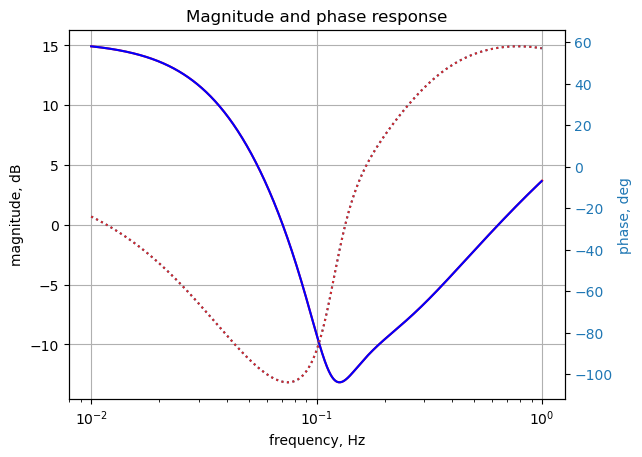

In [89]:
fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(frequency, 20*np.log10(np.abs(voltage)),'-r')    # Bode magnitude plot
plt.semilogx(w/(2*np.pi), mag,'-b')    # Bode magnitude plot

ax1.tick_params(axis='y')
#ax1.set_ylim((-30,20))
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

plt.semilogx(frequency, np.angle(voltage)*180/np.pi,':',color=color)  # Bode phase plot
plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # Bode phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,25))

plt.title('Magnitude and phase response')
plt.show()

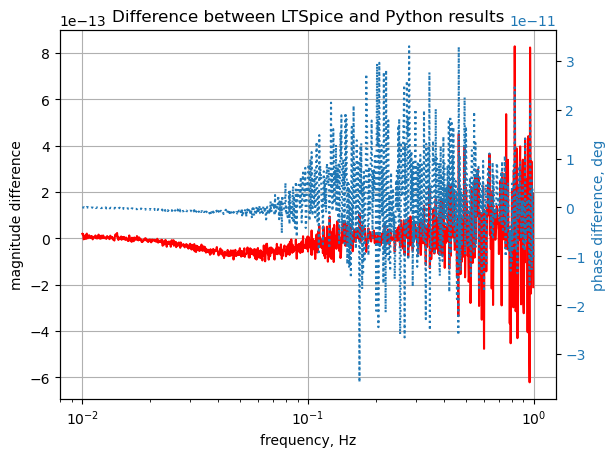

In [90]:
fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude difference')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(frequency[0:-1], np.abs(voltage[0:-1])-10**(mag/20),'-r')    # Bode magnitude plot
#plt.semilogx(w/(2*np.pi), mag,'-b')    # Bode magnitude plot

ax1.tick_params(axis='y')
#ax1.set_ylim((-30,20))
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

plt.semilogx(frequency[0:-1], np.unwrap(2*np.angle(voltage[0:-1])/2) *180/np.pi - phase,':',color=color)  # Bode phase plot
#plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # Bode phase plot

ax2.set_ylabel('phase difference, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,25))

plt.title('Difference between LTSpice and Python results')
plt.show()

The SymPy and LTSpice results overlay each other. The scale for the magnitude is $10^{-13}$ and $10^{-11}$ for the phase indicating the numerical difference is very small.  